<a href="https://colab.research.google.com/github/mayraberrones94/Analisis_Algoritmos/blob/master/Entrega2_pia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.	Programación. Ejecuta el algoritmo de fuzzy c-means utilizando la librería skfuzzy. Utiliza el conjunto Ecoli de UCI. Para ello:

a.	Descarga el conjunto de datos de la página de UCI.

b.	Elimina las columnas del tipo de bacteria.

c.	Considera tres grupos.

d.	Realiza una pequeña discusión sobre los resultados del ejercicio.



In [1]:
import pandas as pd

ecoli = pd.read_csv('/content/drive/MyDrive/Datasets/Datos_curso/ecoli.csv')
ecoli.head()

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [3]:
data = ecoli.drop( columns=[ "SEQUENCE_NAME"  ] )
data

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [7]:
data.dtypes

MCG     float64
GVH     float64
LIP     float64
CHG     float64
AAC     float64
ALM1    float64
ALM2    float64
SITE     object
dtype: object

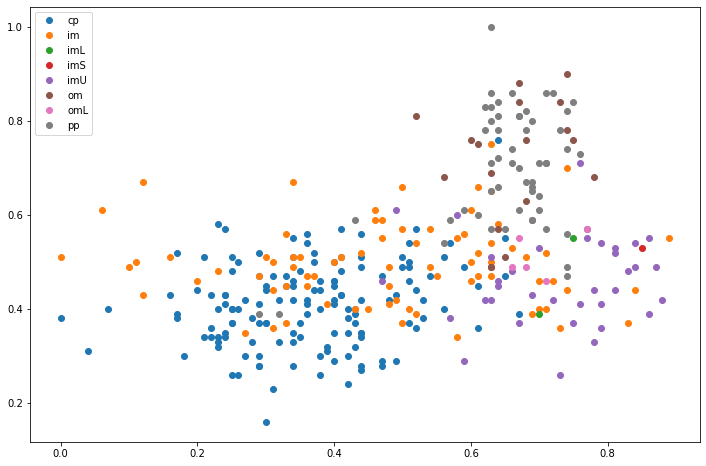

In [33]:
groups = data.groupby(['SITE'])
# Plot
plt.figure(figsize=(12, 8))
for name, group in groups:
    plt.plot(group.MCG, group.GVH, marker='o', linestyle='', label=name)
plt.legend(numpoints=1, loc='upper left')

plt.show()

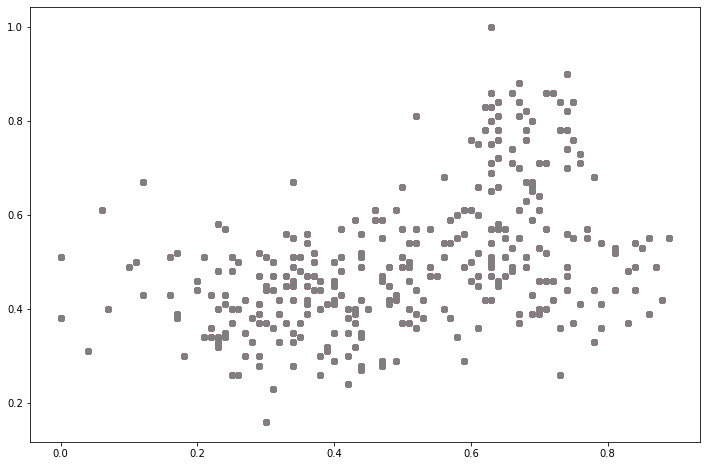

In [30]:
plt.figure(figsize=(12, 8))
for name, group in groups:
  plt.scatter(data.MCG, data.GVH)

plt.show()

In [19]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [20]:
import numpy as np
import pandas as pd
from fcmeans import FCM
from matplotlib import pyplot as plt


In [5]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d3ceeda0d75f100dd47cd6fd0527771ee769e395c2e2283447e24ce055d065b9
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz



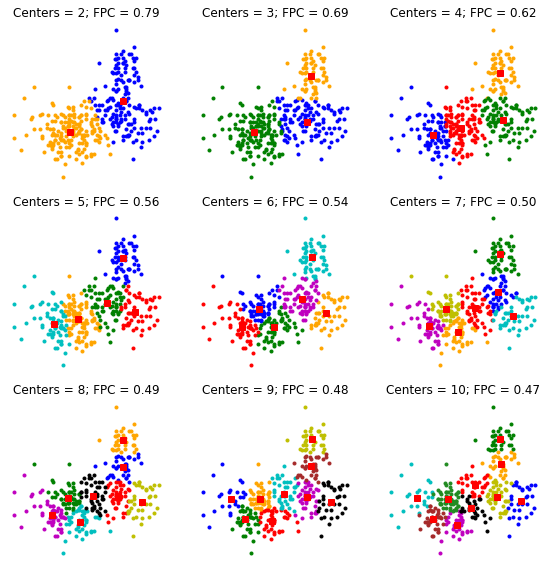

In [31]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((data.MCG, data.GVH))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(data.MCG[cluster_membership == j],
                data.GVH[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

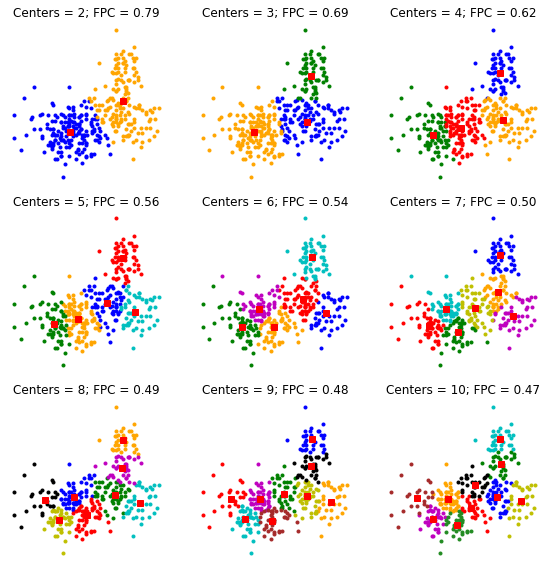

In [66]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((data.MCG, data.GVH))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(data.MCG[cluster_membership == j],
                data.GVH[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()